# Anatomy of a cranked wing

— Agostino De Marco, <font color='darkblue'><i>University of Naples Federico II, Dept. Industrial Engineering</i></font>

Here we call <i>cranked wing</i> a wing planform whose leading edge and trailing edge shapes are piecewise linear. For the sake of simplicity we consider half-wings made of two <i>panels</i>, 
<ul>
<li>an <i>inner panel</i> attached to the fuselage or starting at the aircraft symmetry plane,</li>
<li>an <i>outer panel</i> attached to the inner panel, whose tip is the wing tip.</li>
</ul>

This concept is used in many actual wing configurations. Examples of two-panel wing planform are depicted below.

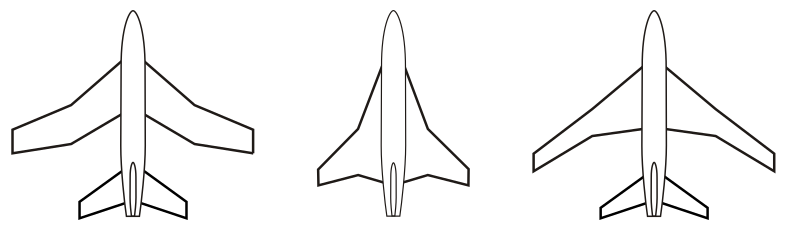

In [96]:
SVG(filename='./resources/Cranked_Wing_Examples.svg')

In this notebook we will explore such a wing shape. We will assign the basic geometric parameters of the planform and will calculate some derived variables that are needed in the aerodynamic analysis of the wing.

We will use the Python language to work out our examples, so we set up some Python tools first.

In [97]:
# Set up the notebook and import required Python packages
%run ./src/cranked_wing/init.py
%run ./src/wing_functions.py
# TODO: clean up the func definitions in the body of this notebook
%matplotlib inline

## Nomenclature

The nomenclature that we use to model our problem is reported in the next figure.

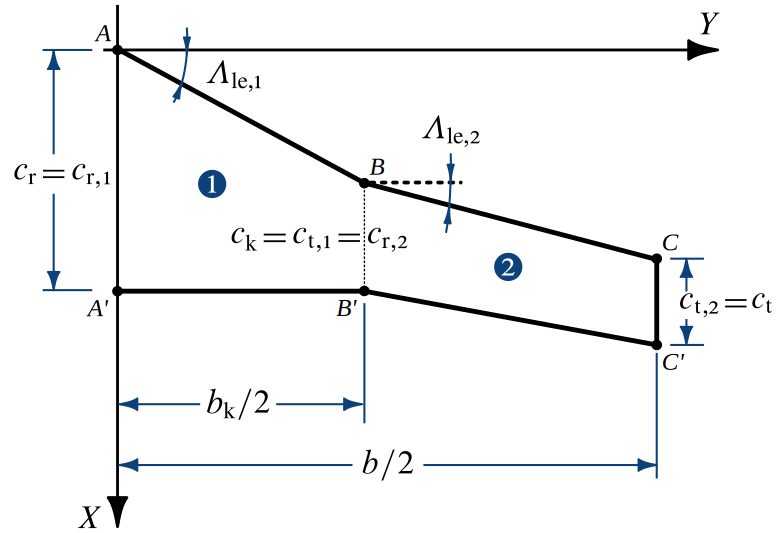

In [98]:
SVG(filename='./resources/cranked_wing_WEB.svg')

The inner and outer panels are referred to as "Panel 1" and "Panel 2," respectively. The $y$-section at which the two panels have the same chord is called <i>kink section</i>, of abscissa $y=\frac{1}{2}b_{\mathrm{k}}$. 

## Wing data

Let us assign a cranked wing planform defined by the following data:

In [99]:
c_r = 5.5; c_k = 2.4; c_t = 1.5; 
b_k = 14.0; b = 28
Lambda_le_1 = 24*math.pi/180; Lambda_le_2 = 24*math.pi/180

In [100]:
Latex(
    r'\begin{array}{rl}'
    +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{kink chord,}\, c_{\mathrm{k}}: & ' + r'{0}'.format(c_k) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan, inner panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0}'.format(b_k/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan,}\, \frac{1}{2}b: & ' + r'{0}'.format(b/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{leading edge sweep, inner panel,}\, \Lambda_{\mathrm{le},1}: &' 
    +    r'{0}'.format(Lambda_le_1*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{leading edge sweep, outer panel,}\, \Lambda_{\mathrm{le},2}: &' 
    +    r'{0}'.format(Lambda_le_2*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

<IPython.core.display.Latex object>

The wing platform shape is represented below.

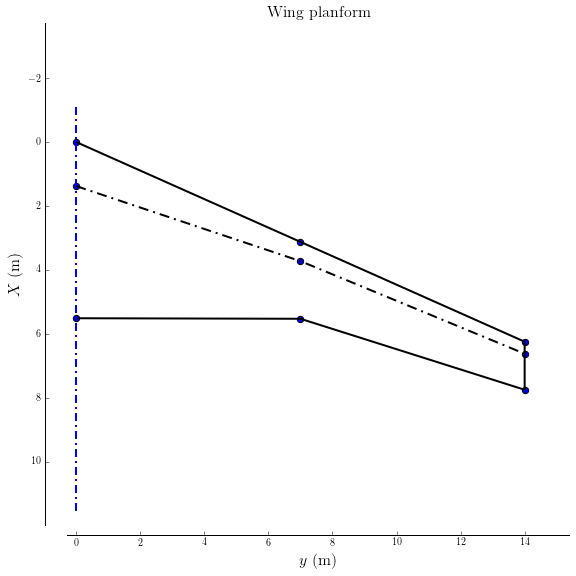

In [101]:
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

### The law of the chords, $c(y)$

The function $c(y)$ is the piecewise linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = 
\begin{cases}
A_{c,1} y + B_{c,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{c,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{c} = 
\begin{cases}
A_{c,1} = \dfrac{2}{b_{\mathrm{k}}} \left( c_{\mathrm{k}} - c_{\mathrm{r}} \right)  
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} = \dfrac{2}{b - b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right)  
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{c} = 
\begin{cases}
B_{c,1} = c_{\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{c,2} = c_{\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

The following code defines function $c(y)$ calculating the above two coefficients:

In [102]:
# c(y)
def f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(c_k - c_r)/b_k; B_ = c_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (c_t - c_k)/(b/2 - b_k/2); B_ = c_k;
        return A_*(y - b_k/2) + B_
    
def f_chord_1(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = 2*(c_k - c_r)/b_k; B_ = c_r;
    return A_*y + B_

def f_chord_2(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = (c_t - c_k)/(b/2 - b_k/2); B_ = c_k;
    return A_*(y - b_k/2) + B_

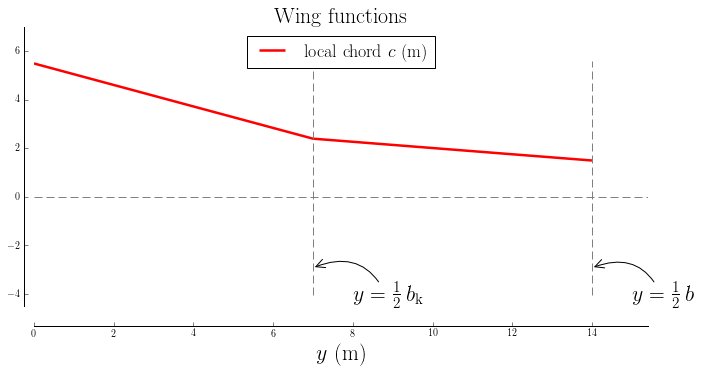

In [103]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 7, ymin = -4.5,
                    figsize = (11,5), vshift_xaxis=20,
                    f_chord = f_chord)

### The law of the leading edge positions, $X_{\mathrm{le}}(y)$

The function $X_{\mathrm{le}}(y)$ is the piecewise law that gives the local leading edge longitudinal coordinate at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
X_{\mathrm{le}}(y) = 
\begin{cases}
A_{X_{\mathrm{le}},1} \, y + B_{X_{\mathrm{le}},1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{X_{\mathrm{le}},2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{X_{\mathrm{le}}} = 
\begin{cases}
A_{X_{\mathrm{le}},1} = \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} = \tan \Lambda_{\mathrm{le},2}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{X_{\mathrm{le}}} = 
\begin{cases}
B_{X_{\mathrm{le}},1} = 0 \, \mathrm{m}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{X_{\mathrm{le}},2} = \frac{1}{2} b_{\mathrm{k}} \, \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

In [104]:
# X_le(y)
def f_Xle(y, b_k, b, Lambda_le_1, Lambda_le_2):
    if y >= 0 and y <= b_k/2:
        A_ = math.tan(Lambda_le_1);
        return A_*y
    elif y > b_k/2 and y <= b/2:
        A_ = math.tan(Lambda_le_2);
        return (b_k/2)*math.tan(Lambda_le_1) + A_*(y - b_k/2)
    
def f_Xle_1(y, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = math.tan(Lambda_le_1);
    return A_*y
    
def f_Xle_2(y, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = math.tan(Lambda_le_2);
    return (b_k/2)*math.tan(Lambda_le_1) + A_*(y - b_k/2)

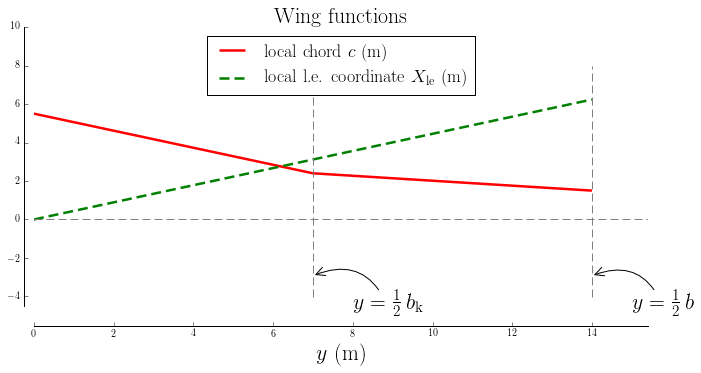

In [105]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 10, ymin = -4.5,
                    figsize = (11,5), vshift_xaxis=20,
                    f_chord = f_chord,
                    f_Xle = f_Xle)

### Calculate $S$, $\bar{c}$, $X_{\mathrm{le},\bar{c}}$, and $Y_{\bar{c}}$

The reference surface:

\begin{equation}
S = 2 \int_{0}^{b/2} c(y) \, \mathrm{d}y
\end{equation}

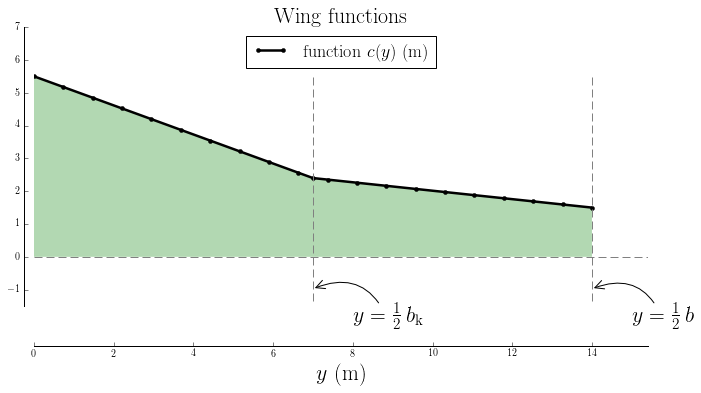

In [106]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    ymax = 7, ymin = -1.5,
                    figsize = (11,5), vshift_xaxis=40,
                    f_S_integral = f_chord)

The planform area is calculated by quadrature of the function $c(y)$. In Python this is done via the package SciPy.

In [107]:
# %run ./src/cranked_wing/init.py
# Definite integral via scipy
S_ref_ = scipy.integrate.quad(
    f_chord, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
# print(S_ref_)
S_ref = 2*S_ref_[0]
print('S = {0} m^2'.format(S_ref))

S = 82.60000000000001 m^2


The mean aerodynamic chord:

\begin{equation}
\bar{c} = \frac{2}{S} \int_{0}^{b/2} c^2(y) \, \mathrm{d}y
\end{equation}

In [108]:
# c^2(y)
def f_chord_squared(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)**2

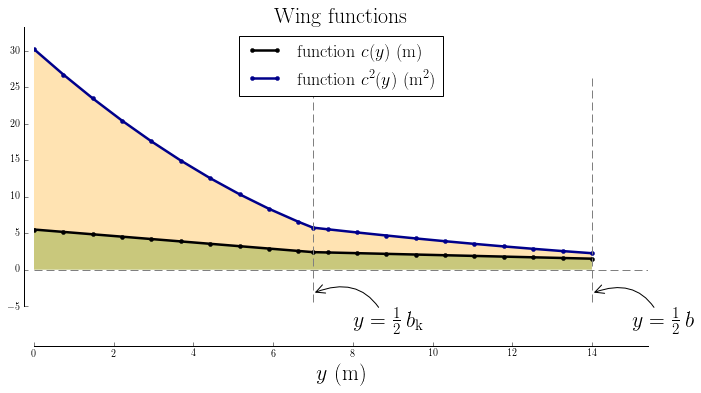

In [109]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 1.1*c_r**2, ymin = -5,
                    figsize = (11,5), vshift_xaxis=40,
                    f_S_integral = f_chord,
                    f_mac_integral = f_chord_squared)

The mean aerodynamic chord is calculated by quadrature of the function $c^2(y)$.

In [110]:
# %run ./src/cranked_wing/init.py
# Definite integral via scipy
c_mac_ = scipy.integrate.quad(
    f_chord_squared, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(c_mac_)
c_mac = (2/S_ref)*c_mac_[0]
print('mac = {0} m'.format(c_mac))

(141.91333333333333, 1.5755545016797137e-12)
mac = 3.436158192090395 m


The mean aerodynamic chord leading edge:

\begin{equation}
X_{\mathrm{le},\bar{c}} = \frac{2}{S} \int_{0}^{b/2} X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y
\end{equation}

In [111]:
# X_le(y) * c(y)
def f_Xle_c(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return f_Xle(y, b_k, b, Lambda_le_1, Lambda_le_2)*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

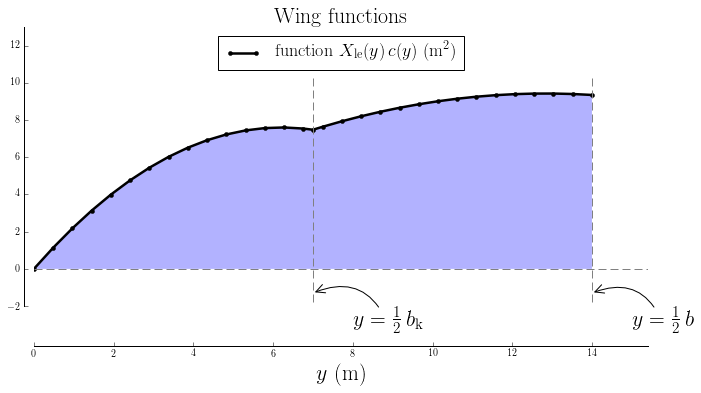

In [112]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 30, 
                    ymax = 13, ymin = -2,
                    figsize = (11,5), vshift_xaxis=40,                    
                    f_Xle_mac_integral = f_Xle_c)

The coordinate $X_{\mathrm{le},\bar{c}}$ of the function $X_{\mathrm{le}}(y)\,c(y)$.

In [113]:
# %run ./src/cranked_wing/init.py
# Definite integral via scipy
X_le_mac_ = scipy.integrate.quad(
    f_Xle_c, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(X_le_mac_)
X_le_mac = (2/S_ref)*X_le_mac_[0]
print('X_le_mac = {0} m'.format(X_le_mac))

(99.62733881587343, 1.1060856543551428e-12)
X_le_mac = 2.412284232829865 m


The mean aerodynamic chord spanwise location:

\begin{equation}
Y_{\bar{c}} = \frac{2}{S} \int_{0}^{b/2} y \, c(y) \, \mathrm{d}y
\end{equation}

In [114]:
# y * c(y)
def f_y_c(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return y*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

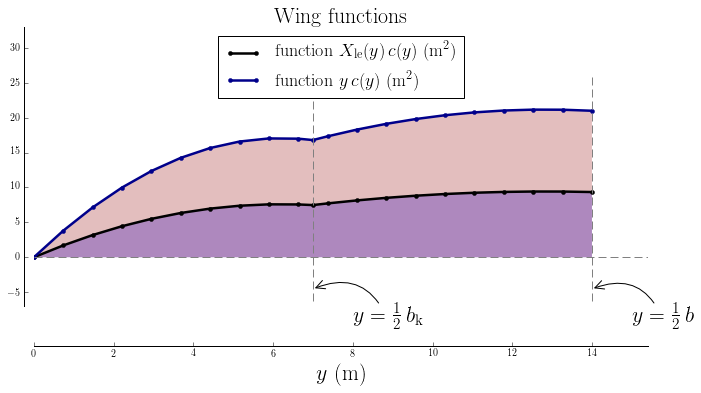

In [115]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 33, ymin = -7,
                    figsize = (11,5), vshift_xaxis=40,                    
                    f_Xle_mac_integral = f_Xle_c,
                    f_Y_mac_integral = f_y_c)

In [116]:
# %run ./src/cranked_wing/init.py
# Definite integral via scipy
Y_mac_ = scipy.integrate.quad(
    f_y_c, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(Y_mac_)
Y_mac = (2/S_ref)*Y_mac_[0]
print('Y_mac = {0} m'.format(Y_mac))

(223.76666666666665, 2.4843090547695583e-12)
Y_mac = 5.418079096045196 m


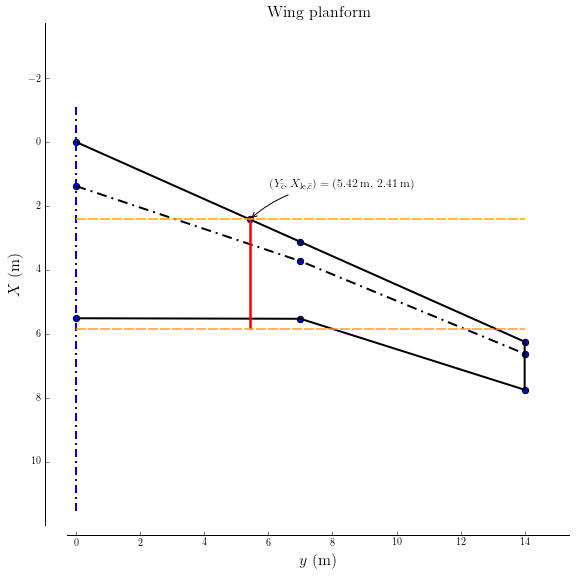

In [117]:
# %run ./src/aerodynamic_center_wing/init.py
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac)

### The laws of geometric twist $\epsilon_{\mathrm{g}}(y)$ and of profile zero-lift angle of attack $\alpha_{0\ell}(y)$

The function $\epsilon_{\mathrm{g}}(y)$ is the piecewise law that gives the geometric twist of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\epsilon_{\mathrm{g}}(y) = 
\begin{cases}
A_{\epsilon,1} \, y + B_{\epsilon,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\epsilon,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\epsilon} = 
\begin{cases}
A_{\epsilon,1} = \dfrac{2}{b_{\mathrm{k}}}\, \epsilon_{\mathrm{g,k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \epsilon_{\mathrm{g,t}} - \epsilon_{\mathrm{g,k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\epsilon} = 
\begin{cases}
B_{\epsilon,1} = 0 \, \mathrm{rad}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\epsilon,2} = \epsilon_{\mathrm{g,k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the geometric twist at kink and tip sections:

In [118]:
eps_k = 0*math.pi/180
eps_t = -2.0*math.pi/180

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [119]:
# eps_g(y)
def f_twist(y, eps_k, eps_t, b_k, b):
    if y >= 0 and y <= b_k/2:
        A_ = 2*eps_k/b_k; B_ = 0;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
        return A_*(y - b_k/2) + B_
    
def f_twist_1(y, eps_k, eps_t, b_k, b):
    A_ = 2*eps_k/b_k; B_ = 0;
    return A_*y + B_

def f_twist_2(y, eps_k, eps_t, b_k, b):
    A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
    return A_*(y - b_k/2) + B_

The function $\alpha_{0\ell}(y)$ is the piecewise law that gives the zero-lift angle of attack of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\alpha_{0\ell}(y) = 
\begin{cases}
A_{\alpha,1} \, y + B_{\alpha,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\alpha,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\alpha} = 
\begin{cases}
A_{\alpha,1} = \dfrac{2}{b_{\mathrm{k}}}\, \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \alpha_{0\ell,\mathrm{t}} - \alpha_{0\ell,\mathrm{k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\alpha} = 
\begin{cases}
B_{\alpha,1} = \alpha_{0\ell,\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\alpha,2} = \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the profile zero-lift alpha at root, kink and tip sections:

In [120]:
alpha0l_r = -3.0*math.pi/180
alpha0l_k = -3.0*math.pi/180
alpha0l_t = -2.0*math.pi/180

The following code defines function $\alpha_{0\ell}(y)$ calculating the above two coefficients:

In [121]:
# alpha0l(y)
def f_alpha0l(y, alpha0l_r, alpha0l_k, alpha0l_t, b_k, b):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
        return A_*(y - b_k/2) + B_
    
def f_alpha0l_1(y, alpha0l_r, alpha0l_k, alpha0l_t, b_k, b):
    A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
    return A_*y + B_

def f_alpha0l_2(y, alpha0l_r, alpha0l_k, alpha0l_t, b_k, b):
    A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
    return A_*(y - b_k/2) + B_

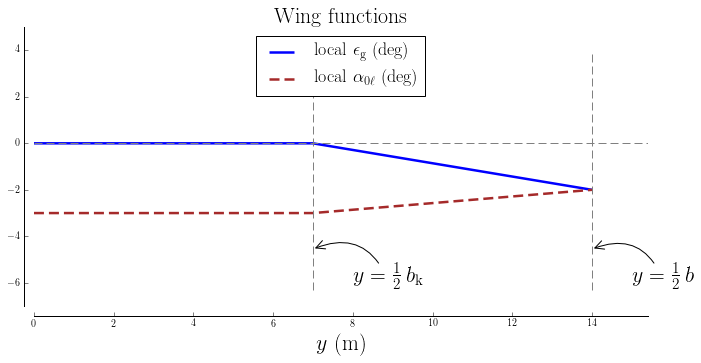

In [122]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 5, ymin = -7,
                    figsize = (11,5), vshift_xaxis=10,                    
                    f_twist = f_twist,
                    f_alpha0l = f_alpha0l)

## The wing zero-lift angle of attack $\alpha_{0L,\mathrm{W}}$

The zero-lift angle of attack is given by the following formula:

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b/2} 
    \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big]
    c(y) \, \mathrm{d}y
\end{equation}

where the functions $c(y)$, $\alpha_{0\ell}(y)$, and $\epsilon_{\mathrm{g}}(y)$ are the piecewise linear functions defined above.

In [123]:
# [ alpha_0l(y) - eps_g(y) ] * c(y)
def f_alpha0l_epsg_c(y, c_r, c_k, c_t, 
                     eps_k, eps_t,
                     alpha0l_r, alpha0l_k, alpha0l_t, 
                     b_k, b, Lambda_le_1, Lambda_le_2):
    return (f_alpha0l(y, alpha0l_r, alpha0l_k, alpha0l_t, b_k, b)
               - f_twist(y, eps_k, eps_t, b_k, b)
           )*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

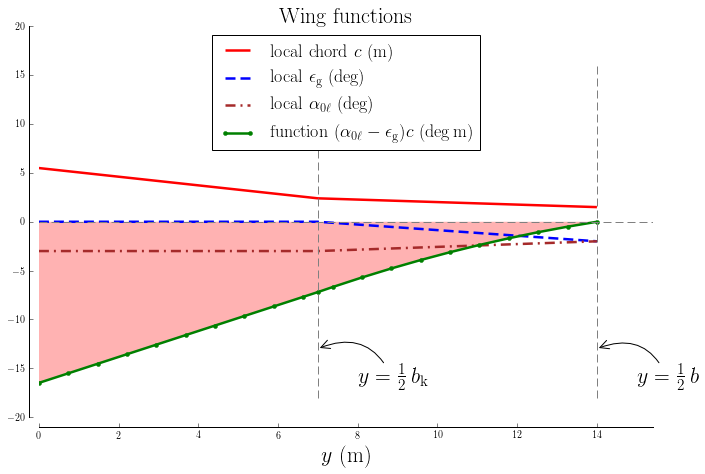

In [124]:
# %run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 20, ymin = -20,
                    figsize = (11,7), vshift_xaxis=10,                    
                    f_chord = f_chord,
                    f_twist = f_twist,
                    f_alpha0l = f_alpha0l,
                    f_alpha0L_integral = f_alpha0l_epsg_c)

Let us calculate the above integral with the aid of Python and the package NumPy.

In [125]:
# %run ./src/cranked_wing/init.py
# Definite integral via scipy
alpha0L_ = scipy.integrate.quad(
    f_alpha0l_epsg_c, 0, b/2, 
    args=(c_r, c_k, c_t, 
          eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
          b_k, b, Lambda_le_1, Lambda_le_2)
    )
print(alpha0L_)
alpha0L = (2/S_ref)*alpha0L_[0]
print('alpha_0L = {0} rad'.format(alpha0L))
print('alpha_0L = {0} deg'.format(alpha0L*180/math.pi))

(-1.8325957145940457, 2.0345899571717014e-14)
alpha_0L = -0.04437277759307616 rad
alpha_0L = -2.542372881355931 deg


## Store the results persistently

In [126]:
# %run ./src/cranked_wing/init.py

# http://stackoverflow.com/questions/26106833/save-workspace-in-ipython
# %run ./src/save_user_variables.py

# https://docs.python.org/3.5/library/shelve.html
import shelve
store = shelve.open('cranked_wing_store', flag='n')
store['c_r'] = c_r
store['c_k'] = c_k
store['c_t'] = c_t
store['b_k'] = b_k
store['b'] = b
store['Lambda_le_1'] = Lambda_le_1
store['Lambda_le_2'] = Lambda_le_2
store['S_ref'] = S_ref
store['c_mac'] = c_mac
store['X_le_mac'] = X_le_mac
store['Y_mac'] = Y_mac
store['alpha0L'] = alpha0L
store.close()

# https://www.quora.com/Can-lambda-functions-and-other-Python-code-be-pickled
# import cloudpickle
# blob = cloudpickle.dumps(f_chord)